In [1]:
# Based on ModuleEfficiencyScan.py

In [2]:
# External
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut

In [3]:
# Uncertainty estimation 

def BinomialApproximation(data_):
    # What happens if the number of failures gets close to zero?
    n_failures = np.sum(data_["Failures"])
    n_total = np.sum(data_["Total"])
    q = n_failures / n_total # binomial
    se_q = np.sqrt(q * (1 - q) / n_total)
    return se_q

def PoissonUncertainty(data_):
    n_failures = np.sum(data_["Failures"])
    n_total = np.sum(data_["Total"])
    return np.sqrt(n_failures) / (n_total)

# This is nice
from statsmodels.stats.proportion import proportion_confint
def WilsonUncertainty(data_, conservative=True):
    # What happens if the number of failures gets close to zero?
    k = np.sum(data_["Failures"])
    N = np.sum(data_["Total"])
    lower, upper = proportion_confint(k, N, method="wilson")
    point = k/N
    if conservative: 
        return abs((upper - point) / 2)
    else:
        return abs((lower - point) / 2)

In [25]:
# Print results for a single data point
dataset = "MDC2020ae"
particle = "all"
PE = "10" 
layer = "3" 
cut = "crv_44_trigger" # track_crv12" # _only"
i = "Pass8"
# "crv_trigger" "crv_2layers_trigger" "crv_3layers_trigger"
# inDir=f"../Txt/{dataset}/concatenated/results"
# inDir=f"../Txt/{dataset}/results/001205_00000121"
inDir=f"../Txt/{dataset}/Summer24/{i}/concatenated/results"
finName = f"{inDir}/results_{particle}_{PE}PEs{layer}Layers_{cut}.csv"

print(finName)
    
data_ = pd.read_csv(finName)

nsuccesses = np.sum(data_["Successes"])
nfailures = np.sum(data_["Failures"])
ntotal = np.sum(data_["Total"])

ineff = nfailures / ntotal 
ineffErr = WilsonUncertainty(data_, conservative=True)

# Append output string 
resultStr = f"""
    **********************************************
    Particle: {particle}
    PEs/layer: {PE}
    Layers: {layer}/4
    Trigger: {cut}

    Successes: {nsuccesses}
    Failures: {nfailures}
    Total: {ntotal}
    Inefficiency: {nfailures}/{ntotal} = {ineff*100:.4f} +/- {ineffErr*100:.4f}%
    **********************************************
    """

print(resultStr)
print(data_)

# #######################

# # Print results for a single data point
# dataset = "MDC2020ae"
# particle = "all"
# PE = "10" 
# layer = "3" 
# cut = "crv_2layers_trigger" # track_crv12" # _only"
# # "crv_trigger" "crv_2layers_trigger" "crv_3layers_trigger"
# # inDir=f"../Txt/{dataset}/concatenated/results"
# # inDir=f"../Txt/{dataset}/results/001205_00000121"
# inDir=f"../Txt/{dataset}/Summer24/SeventhPass/concatenated/results"
# finName = f"{inDir}/results_{particle}_{PE}PEs{layer}Layers_{cut}.csv"

# print(finName)
    
# data_ = pd.read_csv(finName) 

# print(data_)

# nsuccesses = np.sum(data_["Successes"])
# nfailures = np.sum(data_["Failures"])
# ntotal = np.sum(data_["Total"])

# ineff = nfailures / ntotal 
# ineffErr = WilsonUncertainty(data_, conservative=True)

# # Append output string 
# resultStr = f"""
#     particle: {particle}
#     PEs/layer: {PE}
#     Layers: {layer}/4
#     Cut: {cut}

#     Successes: {nsuccesses}
#     Failures: {nfailures}
#     Total: {ntotal}
#     Inefficiency: {nfailures}/{ntotal} = {ineff*100:.4f} +/- {ineffErr*100:.4f}%
#     """

# print(resultStr)

# # #######################

# # Print results for a single data point
# dataset = "MDC2020ae"
# particle = "all"
# PE = "10" 
# layer = "3" 
# cut = "crv_2layersB_trigger" # track_crv12" # _only"
# # "crv_trigger" "crv_2layers_trigger" "crv_3layers_trigger"
# # inDir=f"../Txt/{dataset}/concatenated/results"
# # inDir=f"../Txt/{dataset}/results/001205_00000121"
# inDir=f"../Txt/{dataset}/Summer24/SeventhPass/concatenated/results"
# finName = f"{inDir}/results_{particle}_{PE}PEs{layer}Layers_{cut}.csv"

# print(finName)
    
# data_ = pd.read_csv(finName) 

# print(data_)

# nsuccesses = np.sum(data_["Successes"])
# nfailures = np.sum(data_["Failures"])
# ntotal = np.sum(data_["Total"])

# ineff = nfailures / ntotal 
# ineffErr = WilsonUncertainty(data_, conservative=True)

# # Append output string 
# resultStr = f"""
#     particle: {particle}
#     PEs/layer: {PE}
#     Layers: {layer}/4
#     Cut: {cut}

#     Successes: {nsuccesses}
#     Failures: {nfailures}
#     Total: {ntotal}
#     Inefficiency: {nfailures}/{ntotal} = {ineff*100:.4f} +/- {ineffErr*100:.4f}%
#     """

# print(resultStr)
# # inDir=f"../Txt/{dataset}/concatenated/failures_concise"
# # inDir=f"../Txt/{dataset}/failures_concise/001205_00000121"
# inDir=f"../Txt/{dataset}/Summer24/SeventhPass/concatenated/failures_concise"
# finName = f"{inDir}/failures_concise_{particle}_{PE}PEs{layer}Layers_{cut}.csv"

# data_ = pd.read_csv(finName) 
# print(data_)

# # inDir=f"../Txt/{dataset}/concatenated/failures_verbose"
# inDir=f"../Txt/{dataset}/failures_verbose/001205_00000121"
# inDir=f"../Txt/{dataset}/Summer24/SeventhPass/concatenated/failures_verbose"
# finName = f"{inDir}/failures_verbose_{particle}_{PE}PEs{layer}Layers_{cut}.txt"

# print(finName)

# with open(finName, 'r') as file:
#     # Iterate over each line in the file
#     for i, line in enumerate(file):
#         print(line.strip())
#         if i > 39:
#         # if i > 85:
#             break


# print("\n\n\n")

../Txt/MDC2020ae/Summer24/Pass8/concatenated/results/results_all_10PEs3Layers_crv_44_trigger.csv

    **********************************************
    Particle: all
    PEs/layer: 10
    Layers: 3/4
    Trigger: crv_44_trigger

    Successes: 610157
    Failures: 6
    Total: 610163
    Inefficiency: 6/610163 = 0.0010 +/- 0.0006%
    **********************************************
    
                Tag  Total  Successes  Failures
0   001205_00000000   6200       6200         0
1   001205_00000001   6334       6334         0
2   001205_00000002   6402       6402         0
3   001205_00000005   6349       6349         0
4   001205_00000006   6438       6438         0
..              ...    ...        ...       ...
91  001205_00000231   6483       6483         0
92  001205_00000243   6427       6427         0
93  001205_00000321   6309       6309         0
94  001205_00000544   6418       6418         0
95  001205_00000554   6450       6450         0

[96 rows x 4 columns]


In [5]:
def PlotGraph(data_, title=None, xlabel=None, ylabel=None, xmin=0, xmax=-1, ymin=0, ymax=-1, fout="scatter.png", effLine=False, log=False, includeBlack=False, NDPI=300):
    
    # Create figure and axes
    fig, ax = plt.subplots()

    # Iterate over each pair of xy lists
    # for i, (label, data_) in enumerate(graphs_.items()):

    #     colour = ut.colours[i+1]
    #     if includeBlack: colour = ut.colours[i]
    colour = ut.colours[1]
    ax.errorbar(data_["x"], data_["y"], xerr=data_["xerr"], yerr=data_["yerr"], fmt='o', color=colour, markersize=4, ecolor=colour, capsize=2, elinewidth=1, linestyle='-')

    if log: 
        ax.set_yscale("log")

    # Set title, xlabel, and ylabel
    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10)

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  
    ax.tick_params(axis='y', labelsize=13)  

    if (ymax > ymin):
        ax.set_ylim(ymin, ymax)

    if (xmax > xmin):
        ax.set_xlim(xmin, xmax)
        
    # Add a line at 99.99% efficiency
    if effLine:
        ax.text(100, 1.2e-4, "99.99% efficiency", color="gray") #, transform=ax.transAxes, ha='right')
        ax.axhline(y=1e-4, color='gray', linestyle='--')

    ax.legend(loc="best", frameon=False, fontsize=13) # , markerscale=5)

    fig.tight_layout()
    fig.show()
    
    # Save the figure
    fig.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("---> Written", fout)

    # Clear memory
    plt.close()

    return

In [6]:
def PlotGraphOverlay(graphs_, title=None, xlabel=None, ylabel=None, xmin=0, xmax=-1, ymin=0, ymax=-1, labels_=[], fout="scatter.png", colours=None, effLine=False, log=False, largePlot=False, includeBlack=False, NDPI=300):


    # print(len(colours_hex), len(graphs_))

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(9, 6) if largePlot else None)

    # Iterate over each pair of xy lists
    for i, (label, data_) in enumerate(graphs_.items()):

        colour = "black"
        if colours:
            colour = colours[i]
        else:
            colour = ut.colours[i+1]
            if includeBlack: colour = ut.colours[i]

        ax.errorbar(data_["x"], data_["y"], xerr=data_["xerr"], yerr=data_["yerr"], fmt='o', color=colour, markersize=4, ecolor=colour, capsize=2, elinewidth=1, linestyle='-',label=label)

    if log: 
        ax.set_yscale("log")

    # Set title, xlabel, and ylabel
    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10)

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  
    ax.tick_params(axis='y', labelsize=13)  

    if (ymax > ymin):
        ax.set_ylim(ymin, ymax)

    if (xmax > xmin):
        ax.set_xlim(xmin, xmax)
        
    # Add a line at 99.99% efficiency
    if effLine:
        ax.text(90, 1.2e-4, "99.99% efficiency", color="gray", fontsize=13) #, transform=ax.transAxes, ha='right')
        ax.axhline(y=1e-4, color='gray', linestyle='--')

    ax.legend(loc="best", frameon=False, fontsize=13) # , markerscale=5)
    # plt.legend(loc='center left', frameon=False, bbox_to_anchor=(1, 0.5))

    fig.tight_layout()
    fig.show()
    
    # Save the figure
    fig.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("---> Written", fout)

    # Clear memory
    # plt.close()

    return

In [7]:
# Produce graph objects of inefficiency, failures, successes
def GetScan(PEs_, layer=3, particle="all", cut="no_track_cuts", dataset="MDC2020ae", inDir=f"../Txt/{dataset}/Summer24/Pass8/concatenated/results"):

    if False: print(f"---> Getting scan data for {layer}/4 layers, {particle}, {cut}, {dataset}.")
    
    ineff_ = { "x" : list(PEs_)
              , "xerr" : [0] * len(PEs_)
              , "y" : [0] * len(PEs_)
              , "yerr" : [0] * len(PEs_)
             }

    nfail_ = { "x" : list(PEs_)
                , "xerr" : [0] * len(PEs_)
                , "y" : [0] * len(PEs_)
                , "yerr" : [0] * len(PEs_)
             }
    nsucc_ = { "x" : list(PEs_)
                , "xerr" : [0] * len(PEs_)
                , "y" : [0] * len(PEs_)
                , "yerr" : [0] * len(PEs_)
             }

    for i, PE in enumerate(PEs_):

        finName = f"{inDir}/results_{particle}_{PE}PEs{layer}Layers_{cut}.csv"
    
        data_ = pd.read_csv(finName) 
        
        ineff_["y"][i] = np.sum(data_["Failures"])/np.sum(data_["Total"])
        ineff_["yerr"][i] = WilsonUncertainty(data_, conservative=True)
        
        nfail_["y"][i] = np.sum(data_["Failures"])
        nfail_["yerr"][i] = np.sqrt(np.sum(data_["Failures"])) # sqrt(N)

        nsucc_["y"][i] = np.sum(data_["Successes"])
        nsucc_["yerr"][i] = np.sqrt(np.sum(data_["Successes"])) # sqrt(N)

    if False: print("Done!")
    
    return {"ineff" : ineff_, "nfail" : nfail_, "nsucc" : nsucc_}

In [8]:
# Setup parameters
dataset = "MDC2020ae"
PEs_ = np.arange(10, 135, 5)

---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_layer_overlay_crv_44_trigger_all.png


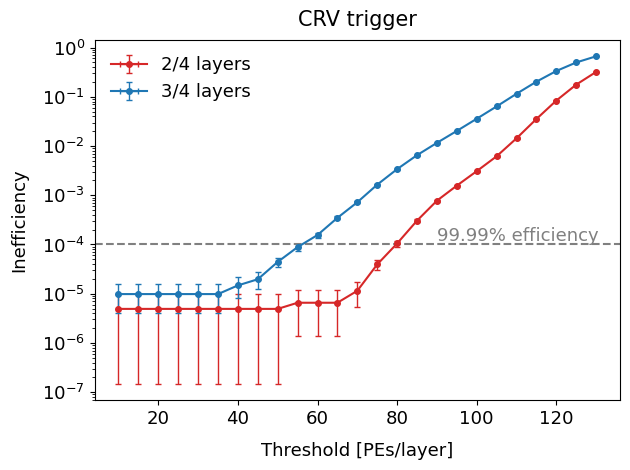

In [9]:
inDir=f"../Txt/{dataset}/Summer24/{i}/concatenated/results"
outDir=f"../Images/{dataset}/ThresholdScan/{i}/"

particle = "all"
cut = "crv_44_trigger"

PlotGraphOverlay( {"2/4 layers" : GetScan(PEs_, 2, "all", cut, inDir)["ineff"], 
                   "3/4 layers" : GetScan(PEs_, 3, "all", cut, inDir)["ineff"] }
                 , title="CRV trigger", xlabel="Threshold [PEs/layer]", ylabel=f"Inefficiency", fout=f"{outDir}/gr_ineff_log_layer_overlay_{cut}_{particle}.png"
                 , log=True, effLine=True)

---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_trigger_full_overlay_all.png
---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_trigger_crv_overlay_all.png
---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_trigger_muon_tagger_result_overlay_all.png
---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_trigger_result_partial_overlay_all.png
---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_crv_B_trigger_result_overlay_all.png
---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_trk_crv_B_trigger_result_overlay_all.png
---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_ineff_log_trk_crv2_B_trigger_result_overlay_all.png


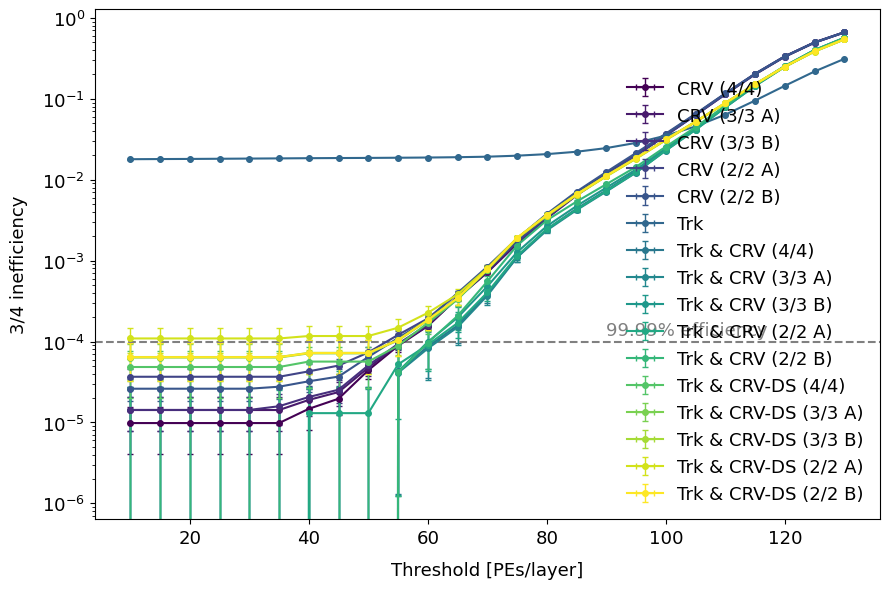

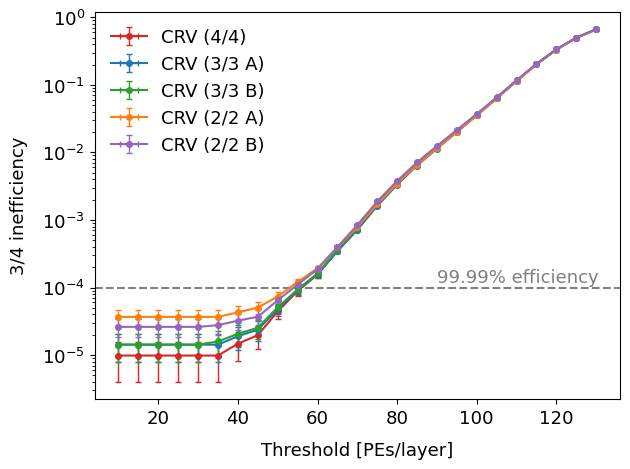

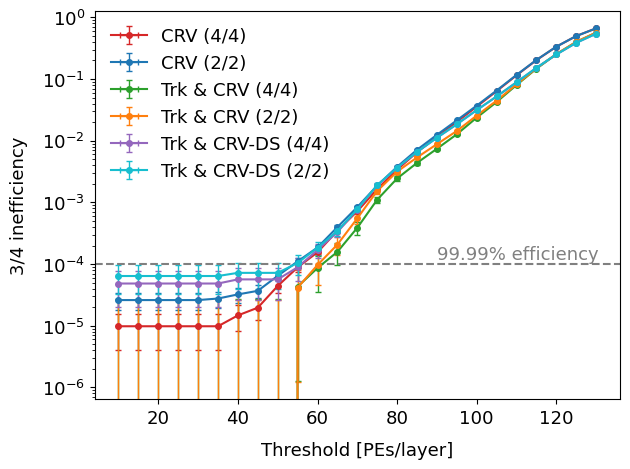

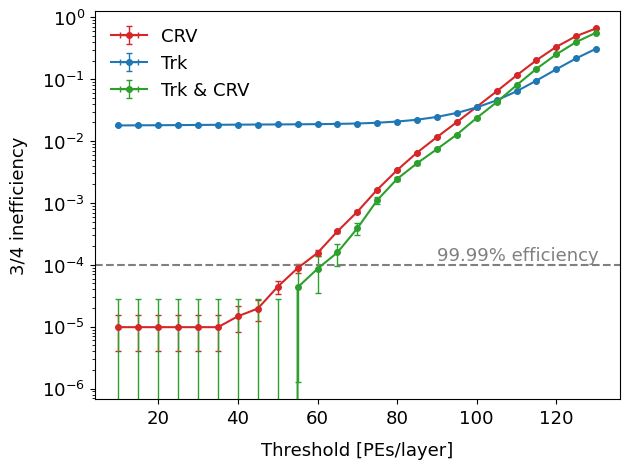

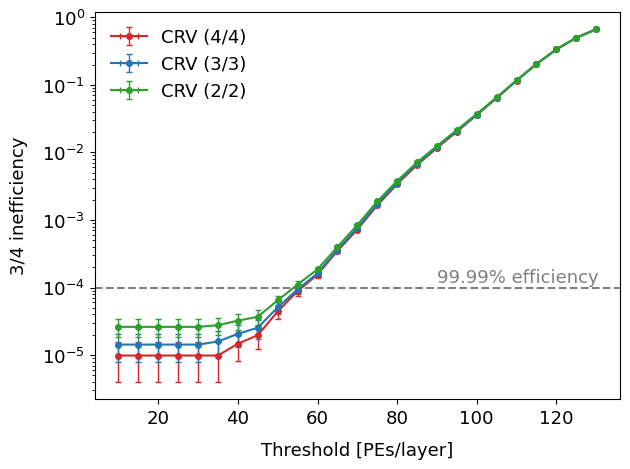

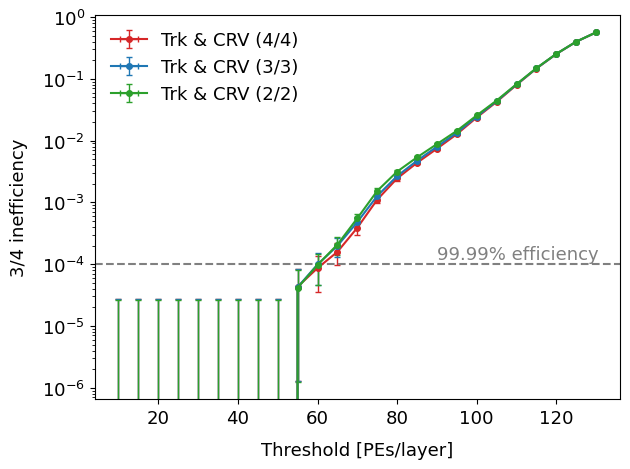

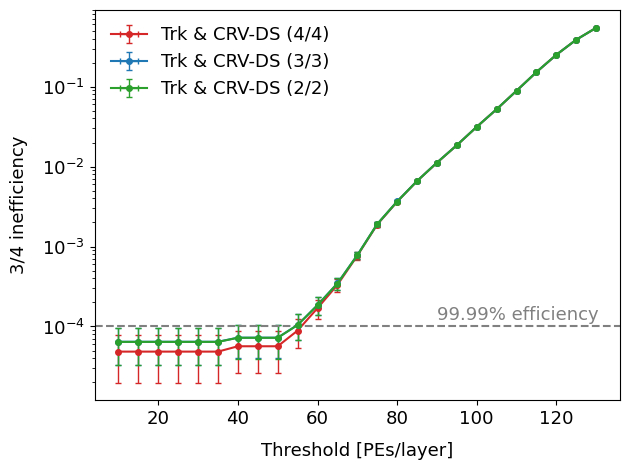

In [28]:
# Plot everything 

triggerModes_ = { "crv_44_trigger" : "CRV (4/4)",
                 "crv_33A_trigger" : "CRV (3/3 A)",
                 "crv_33B_trigger" : "CRV (3/3 B)",
                 "crv_22A_trigger" : "CRV (2/2 A)",
                 "crv_22B_trigger" : "CRV (2/2 B)",
                 "trk_trigger" : "Trk",
                 "trk_crv_44_trigger" : "Trk & CRV (4/4)",
                 "trk_crv_33A_trigger" : "Trk & CRV (3/3 A)",
                 "trk_crv_33B_trigger" : "Trk & CRV (3/3 B)",
                 "trk_crv_22A_trigger" : "Trk & CRV (2/2 A)",
                 "trk_crv_22B_trigger" : "Trk & CRV (2/2 B)",
                 "trk_crv2_44_trigger" : "Trk & CRV-DS (4/4)",
                 "trk_crv2_33A_trigger" : "Trk & CRV-DS (3/3 A)",
                 "trk_crv2_33B_trigger" : "Trk & CRV-DS (3/3 B)",
                 "trk_crv2_22A_trigger" : "Trk & CRV-DS (2/2 A)",
                 "trk_crv2_22B_trigger" : "Trk & CRV-DS (2/2 B)" }

graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]

# Nice colours
import matplotlib.colors as mcolors 
# Create a colormap object
viridis_cmap = plt.get_cmap("viridis")
# Get colors at evenly spaced intervals
n_colors = len(graphs_)
colors_list = [viridis_cmap(i / (n_colors- 1)) for i in range(n_colors)]

# Convert the colors to HEX format
hex_colors_list = [mcolors.to_hex(color) for color in colors_list]
    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_trigger_full_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=True, includeBlack=False, colours=hex_colors_list)

triggerModes_ = { "crv_44_trigger" : "CRV (4/4)",
                 "crv_33A_trigger" : "CRV (3/3 A)",
                 "crv_33B_trigger" : "CRV (3/3 B)",
                 "crv_22A_trigger" : "CRV (2/2 A)",
                 "crv_22B_trigger" : "CRV (2/2 B)" }


graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]

    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_trigger_crv_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=False, includeBlack=False) #, colours=colours)

# Just take "B" 

triggerModes_ = { "crv_44_trigger" : "CRV (4/4)",
                 # "crv_33B_trigger" : "CRV (3/3)",
                 "crv_22B_trigger" : "CRV (2/2)",
                 # "trk_trigger" : "Trk",
                 "trk_crv_44_trigger" : "Trk & CRV (4/4)",
                 # "trk_crv_33B_trigger" : "Trk & CRV (3/3)",
                 "trk_crv_22B_trigger" : "Trk & CRV (2/2)",
                 "trk_crv2_44_trigger" : "Trk & CRV-DS (4/4)",
                 # "trk_crv2_33B_trigger" : "Trk & CRV-DS (3/3)",
                 "trk_crv2_22B_trigger" : "Trk & CRV-DS (2/2)"
                }

# CRV, tracker, tracker & CRV 
graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]
    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_trigger_muon_tagger_result_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=False, includeBlack=False)


triggerModes_ = { "crv_44_trigger" : "CRV",
                 "trk_trigger" : "Trk",
                 "trk_crv_44_trigger" : "Trk & CRV"
                }


graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]
    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_trigger_result_partial_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=False, includeBlack=False)


triggerModes_ = { "crv_44_trigger" : "CRV (4/4)",
                 "crv_33B_trigger" : "CRV (3/3)",
                 "crv_22B_trigger" : "CRV (2/2)"
                }


graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]
    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_crv_B_trigger_result_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=False, includeBlack=False)

triggerModes_ = { 
                 "trk_crv_44_trigger" : "Trk & CRV (4/4)",
                 "trk_crv_33B_trigger" : "Trk & CRV (3/3)",
                 "trk_crv_22B_trigger" : "Trk & CRV (2/2)"
                }


graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]
    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_trk_crv_B_trigger_result_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=False, includeBlack=False)


triggerModes_ = { 
                 "trk_crv2_44_trigger" : "Trk & CRV-DS (4/4)",
                 "trk_crv2_33B_trigger" : "Trk & CRV-DS (3/3)",
                 "trk_crv2_22B_trigger" : "Trk & CRV-DS (2/2)"
                }



graphs_ = {}

for cut, label in triggerModes_.items():
    graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["ineff"]
    
PlotGraphOverlay( graphs_
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_trk_crv2_B_trigger_result_overlay_{particle}.png"
                 , log=True, effLine=True, largePlot=False, includeBlack=False)

---> Written ../Images/MDC2020ae/ThresholdScan/Pass8//gr_log_data_sim_partial_overlay.png


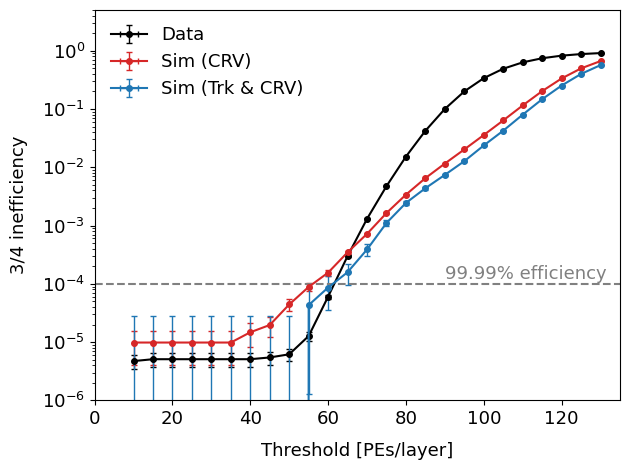

In [27]:
# Compare with Tyler's results
# Tyler's data
finNameWB = f"../Txt/Wideband/Tyler2024.csv"
dataWB = pd.read_csv(finNameWB)
partial = False
if partial:
    dataWB = dataWB[:16]
wb_thresholds = dataWB["Thresholds"]
wb_ineff = dataWB["Observed 3/4 inefficiency"]
wb_ineff_err = dataWB["Error bars, observed 3/4 inefficiency"]

PlotGraphOverlay( {"Data" : {"x": wb_thresholds, "xerr" : [0]*len(wb_thresholds), "y" : wb_ineff, "yerr" : wb_ineff_err}
                    ,"Sim (CRV)" : GetScan(PEs_, 3, "all", "crv_44_trigger")["ineff"] 
                   ,"Sim (Trk & CRV)" : GetScan(PEs_, 3, "all", "trk_crv_44_trigger")["ineff"] }
                 , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_log_data_sim_partial_overlay.png"
                 , ymin=1e-6, ymax=5e0, xmax=135, log=True, includeBlack=True, effLine=True)

In [12]:
# # Compare the 2layers thing. 

# particle = "all"

# inDir=f"../Txt/{dataset}/Summer24/SeventhPass/concatenated/results"
# outDir=f"../Images/{dataset}/ThresholdScan/SeventhPass/"

# # "trk_crv2_trigger": "Tracker and CRV-DS (2/4 layers)",
# # "trk_crv2_2layers_trigger": "Tracker and CRV-DS (2/2 layers)"

# graphs_ = { "CRV (2/4 layers)" : GetScan(PEs_, 3, "all", "crv_trigger", inDir=inDir)["ineff"],
#            "CRV (2/2 layers)" : GetScan(PEs_, 3, "all", "crv_2layers_trigger", inDir=inDir)["ineff"],
#             "Tracker and CRV (2/4 layers)" : GetScan(PEs_, 3, "all", "trk_crv_trigger", inDir=inDir)["ineff"],
#             "Tracker and CRV (2/2 layers)" : GetScan(PEs_, 3, "all", "trk_crv_2layers_trigger", inDir=inDir)["ineff"],
#             "Tracker and CRV-DS (2/4 layers)" : GetScan(PEs_, 3, "all", "trk_crv2_trigger", inDir=inDir)["ineff"],
#             "Tracker and CRV-DS (2/2 layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layers_trigger", inDir=inDir)["ineff"]
#            # "Tracker and CRV (2/4 layers)" : GetScan(PEs_, 3, "all", "trk_crv_2layers_trigger", inDir=inDir)["ineff"],
#            # "CRV-DS (2/2 top layers)" : GetScan(PEs_, 3, "all", "crv2_2layersB_trigger", inDir=inDir)["ineff"]   
#           }



# # graphs_ = { "Tracker and CRV (2/4 layers)" : GetScan(PEs_, 3, "all", "trk_crv2_trigger", inDir=inDir)["ineff"],
# #            "Tracker and CRV-DS (2/2 bottom layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layers_trigger", inDir=inDir)["ineff"],
# #            "Tracker and CRV-DS (2/2 top layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layersB_trigger", inDir=inDir)["ineff"]   
# #           }


# # graphs_ = { "Tracker and CRV-DS (2/4 layers)" : GetScan(PEs_, 3, "all", "trk_crv2_trigger", inDir=inDir)["ineff"],
# #            "Tracker and CRV-DS (2/2 bottom layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layers_trigger", inDir=inDir)["ineff"],
# #            "Tracker and CRV-DS (2/2 top layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layersB_trigger", inDir=inDir)["ineff"]   
# #           }
           

# PlotGraphOverlay( graphs_
#                  , xlabel="Threshold [PEs/layer]", ylabel=f"3/4 inefficiency", fout=f"{outDir}/gr_ineff_log_muon_tagger_overlay_{particle}.png"
#                  , log=True, effLine=True, largePlot=True)
#                  # , ymin=1e-5, ymax=1, largePlot=False)
#                  # , xmin=-15, xmax=150, largePlot=True)

# # graphs_ = { "Tracker and CRV-DS (2/4 layers)" : GetScan(PEs_, 3, "all", "trk_crv2_trigger", inDir=inDir)["nfail"],
# #            "Tracker and CRV-DS (2/2 bottom layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layers_trigger", inDir=inDir)["nfail"],
# #            "Tracker and CRV-DS (2/2 top layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layersB_trigger", inDir=inDir)["nfail"]   
# #           }

# graphs_ = {
#            "Tracker and CRV-DS (2/2 bottom layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layers_trigger", inDir=inDir)["ineff"],
#            "Tracker and CRV-DS (2/2 top layers)" : GetScan(PEs_, 3, "all", "trk_crv2_2layersB_trigger", inDir=inDir)["ineff"]   
#           }


# PlotGraphOverlay( graphs_
#                  , xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_ineff_log_crv2_2layers_top_bottom_overlay_{particle}.png"
#                  , log=True, effLine=True)

# # particle = "muons"

# # graphs_ = {}

# # for cut, label in triggerModes_.items():
# #     graphs_[label] = GetScan(PEs_, 3, particle, cut, inDir=inDir)["nfail"]

# # PlotGraphOverlay( graphs_
# #                  , xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_ineff_log_trigger_overlay_{particle}.png"
# #                  , log=True, effLine=True, largePlot=True)


#                  # , ymin=0.25e-6, ymax=1)
#                  # , xmin=0, xmax=150)


# # particle = "all"
# # cut = "track_cuts"

# # PlotGraphOverlay( {"2/4 layers" : GetScan(PEs_, 2, "all", cut, inDir=inDir)["ineff"], 
# #                    "3/4 layers" : GetScan(PEs_, 3, "all", cut, inDir=inDir)["ineff"] }
# #                  , ymin=1e-6, ymax=1e0
# #                  , title="CRV-L, CRV-DS, and tracker trigger", xlabel="Threshold [PEs/layer]", ylabel=f"Inefficiency", fout=f"{outDir}/gr_ineff_log_layer_overlay_{cut}_{particle}.png"
# #                  , log=True, effLine=True )

# # PlotGraphOverlay( {"2/4 layers" : GetScan(PEs_, 2, "all", cut)["ineff"], 
# #                    "3/4 layers" : GetScan(PEs_, 3, "all", cut)["ineff"] }
# #                  , ymin=1e-6, ymax=1e0
# #                  , title="With track cuts", xlabel="Threshold [PEs/layer]", ylabel=f"Inefficiency", fout=f"{outDir}/gr_ineff_log_layer_overlay_{cut}_{particle}.png"
# #                  , log=False, effLine=True)

In [13]:
# # 2 layers is more efficient?? 


# particle = "all"
# layer = "2"

# # PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, "all", "singles")["ineff"], 
# #                    "Track cuts" : GetScan(PEs_, layer, "all", "singles_track_cuts")["ineff"] }
# #                  , xmax=135, xlabel="Threshold [PEs/layer]", ylabel=f"{layer}/4 inefficiency", fout=f"{outDir}/gr_ineff_log_layer_overlay_{cut}_{particle}.png", log=True)

# layer = "3"

# PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, "all", "no_track_cuts")["ineff"], 
#                    "Track cuts" : GetScan(PEs_, layer, "all", "track_cuts")["ineff"] }
#                  # , ymin=1e-6, ymax=1e0
#                  , xlabel="Threshold [PEs/layer]", ylabel=f"{layer}/4 inefficiency", fout=f"{outDir}/gr_ineff_log_cut_overlay_{layer}layers_{particle}.png"
#                  , log=True, effLine=True) 

In [14]:
# Compare failures 
# particles_ = ["all", "muons", "non_muons"]
# layer = "3"

# # for cut in {no_track_cuts", "track_cuts"]:
# cut="no_track_cuts"
# PlotGraphOverlay( {"Sim (all)" : GetScan(PEs_, 3, "all", cut)["nfail"] 
#                    ,"Sim (muons)" : GetScan(PEs_, 3, "muons", cut)["nfail"] 
#                    ,"Sim (non-muons)" : GetScan(PEs_, 3, "non_muons", cut)["nfail"] 
#                   }
#                  , title="No track cuts"
#                  , xlabel="Threshold [PEs/layer]"
#                  , ylabel="Failures"
#                  , fout=f"{outDir}/gr_nfail_particle_overlay_{cut}.png"
#                  , log=True
#                  )
# cut="track_cuts"
# PlotGraphOverlay( {"Sim (all)" : GetScan(PEs_, 3, "all", cut)["nfail"] 
#                    ,"Sim (muons)" : GetScan(PEs_, 3, "muons", cut)["nfail"] 
#                    ,"Sim (non-muons)" : GetScan(PEs_, 3, "non_muons", cut)["nfail"] 
#                   }
#                  , title="Track cuts"
#                  , xlabel="Threshold [PEs/layer]"
#                  , ylabel="Failures"
#                  , fout=f"{outDir}/gr_nfail_particle_overlay_{cut}.png"
#                  , log=True
#                  )
# for particle in particles_:
#     PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nfail"], 
#                        "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nfail"] }
#                      , xmax=135, title=particle, xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_nfail_cut_overlay_{layer}layers_{particle}.png", log=False)
#     PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nfail"], 
#                        "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nfail"] }
#                      , xmax=135, title=particle, xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_log_nfail_cut_overlay_{layer}layers_{particle}.png", log=True)

In [15]:
# # Compare successes 
# particle = "all"
# layer = "3"

# # PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, "all", "singles")["nsucc"], 
# #                    "Track cuts" : GetScan(PEs_, layer, "all", "singles_track_cuts")["nsucc"] }
# #                  , xmax=135, xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_nsucc_log_cut_overlay_{layer}layers_{particle}.png", log=True)

# PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, "all", "no_track_cuts")["nsucc"], 
#                    "Track cuts" : GetScan(PEs_, layer, "all", "track_cuts")["nsucc"] }
#                  , xmax=135, xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_nsucc_cut_overlay_{layer}layers_{particle}.png", log=False)

In [16]:
# # Compare successes 
# particles_ = ["all", "muons", "non_muons"]
# layer = "3"

# for particle in particles_:
#     PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nsucc"], 
#                        "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nsucc"] }
#                      , xmax=135, title=particle, xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_nsucc_cut_overlay_{layer}layers_{particle}.png", log=False)
#     PlotGraphOverlay( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nsucc"], 
#                        "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nsucc"] }
#                      , xmax=135, title=particle, xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_log_nsucc_cut_overlay_{layer}layers_{particle}.png", log=True)

In [17]:
# from matplotlib.ticker import ScalarFormatter

# def PlotGraphRatio(graphs_, title=None, xlabel=None, ylabel=None, xmin=0, xmax=-1, ymin=0, ymax=-1, fout="ratio.png", log=False, NDPI=300, limitRatio=False, ratioMin=0, ratioMax=1):
    
#     if len(graphs_) != 2: 
#         raise Exception("!!! PlotGraphRatio must take exactly two graphs as input !!!")
    
#     # Create figure and axes
#     fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 6))

#     # Extract the first and second graph
#     graph1, graph2 = graphs_.values()

#     # Iterate over each pair of xy lists
#     for i, (label, graph_) in enumerate(graphs_.items()):

#         colour = ut.colours[i+1]

#         ax1.errorbar(graph_["x"], graph_["y"], xerr=graph_["xerr"], yerr=graph_["yerr"], fmt='o', color=colour, markersize=4, ecolor=colour, capsize=2, elinewidth=1, linestyle='-',label=label)

#     # # Plot the first graph in the top frame
#     # ax1.errorbar(graph1["x"], graph1["y"], xerr=graph1["xerr"], yerr=graph1["yerr"], fmt='o', color=ut.colours[1], markersize=4, ecolor=ut.colours[1], capsize=2, elinewidth=1, linestyle='-', label='Graph 1')

#     # # Plot the second graph in the top frame
#     # ax1.errorbar(graph2["x"], graph2["y"], xerr=graph2["xerr"], yerr=graph2["yerr"], fmt='o', color=ut.colours[2], markersize=4, ecolor=ut.colours[2], capsize=2, elinewidth=1, linestyle='-', label='Graph 2')

#     if log: 
#         ax1.set_yscale("log")

#     # Remove markers for main x-axis
#     ax1.set_xticks([])

#     # Calculate the ratio of the y-values with a check for division by zero
#     ratio = np.divide(graph1["y"], graph2["y"], out=np.full_like(graph1["y"], np.nan, dtype=float), where=(graph2["y"] != 0))

#     # Calculate the statistical uncertainty for the ratio
#     # THIS IGNORES THE CORRELATION SO IS AN OVERESTIMATION.
#     ratio_err = np.divide(np.sqrt(graph1["y"]), graph2["y"], out=np.full_like(graph1["y"], np.nan, dtype=float), where=(graph2["y"] != 0))

#     # Plot the ratio in the lower frame with error bars
#     ax2.errorbar(graph1["x"], ratio, yerr=ratio_err, fmt='o', color='black', markersize=4, capsize=2, elinewidth=1, linestyle='-')

#     # Add a horizontal line at ratio = 1
#     # ax2.axhline(y=1.0, color='gray', linestyle='--', linewidth=1)

#     # Set the limits for the ratio plot if specified
#     if limitRatio:
#         ax2.set_ylim(ratioMin, ratioMax)

#     # Set the x-axis limits for both plots
#     if (xmax > xmin):
#         ax1.set_xlim(xmin, xmax)
#         ax2.set_xlim(xmin, xmax)

#     # Set title, xlabel, and ylabel
#     ax1.set_title(title, fontsize=16, pad=10)
#     ax1.set_ylabel(ylabel, fontsize=14, labelpad=10)
#     ax2.set_xlabel(xlabel, fontsize=14, labelpad=10)
#     ax2.set_ylabel("Ratio", fontsize=14, labelpad=10)

#     # Set font size of tick labels on x and y axes
#     ax1.tick_params(axis='y', labelsize=14)  
#     ax2.tick_params(axis='x', labelsize=14)
#     ax2.tick_params(axis='y', labelsize=14)

#     # Scientific notation for axes if necessary
#     if ax2.get_xlim()[1] > 9999:
#         ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#         ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#         ax2.xaxis.offsetText.set_fontsize(14)
#     if ax1.get_ylim()[1] > 9999:
#         ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#         ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#         ax1.yaxis.offsetText.set_fontsize(14)

#     # Add legend to the top frame
#     ax1.legend(loc="best", frameon=False, fontsize=14)

#     # Adjust the spacing between subplots
#     fig.tight_layout()
#     fig.subplots_adjust(hspace=-0.01)

#     # Show plot
#     fig.show()

#     # Save the figure
#     fig.savefig(fout, dpi=NDPI, bbox_inches="tight")
#     print("---> Written", fout)

#     # Clear memory
#     # plt.close()

#     return

In [18]:
# PlotGraphRatio( {"No track cuts" : GetScan(PEs_, layer, "all", "no_track_cuts")["nfail"], 
#                    "Track cuts" : GetScan(PEs_, layer, "all", "track_cuts")["nfail"] }
#                  , xmax=135, xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_nfail_cut_ratio_{layer}layers_{particle}.png", log=True)

In [19]:
# PlotGraphRatio( {"No track cuts" : GetScan(PEs_, layer, "all", "no_track_cuts")["nsucc"], 
#                    "Track cuts" : GetScan(PEs_, layer, "all", "track_cuts")["nsucc"] }
#                  , xmax=135, xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_nsucc_cut_ratio_{layer}layers_{particle}.png", log=True)

In [20]:
# # Muons
# particle="muons"
# PlotGraphRatio( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nfail"], 
#                    "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nfail"] }
#                  , xmax=135, title="Muons", xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_nfail_cut_ratio_{layer}layers_{particle}.png", log=False)
# # Muons
# # particle="muons"
# PlotGraphRatio( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nsucc"], 
#                    "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nsucc"] }
#                  , xmax=135, title="Muons", xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_nsucc_cut_ratio_{layer}layers_{particle}.png", log=False)

In [21]:
# # Non muons
# particle="non_muons"
# PlotGraphRatio( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nfail"], 
#                    "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nfail"] }
#                  , xmax=135, title="Non-muons", xlabel="Threshold [PEs/layer]", ylabel=f"Failures", fout=f"{outDir}/gr_nfail_cut_ratio_{layer}layers_{particle}.png", log=False)
# # Muons
# # particle="muons"
# PlotGraphRatio( {"No track cuts" : GetScan(PEs_, layer, particle, "no_track_cuts")["nsucc"], 
#                    "Track cuts" : GetScan(PEs_, layer, particle, "track_cuts")["nsucc"] }
#                  , xmax=135, title="Non-muons", xlabel="Threshold [PEs/layer]", ylabel=f"Successes", fout=f"{outDir}/gr_nsucc_cut_ratio_{layer}layers_{particle}.png", log=False)